In [70]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)


2.12.0


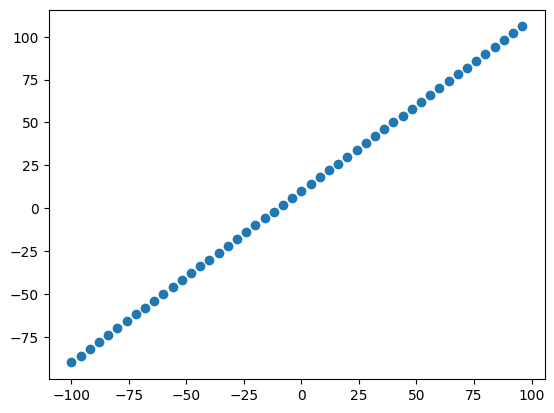

In [60]:
x = tf.range(-100, 100, 4)
y = x+10
plt.scatter(x, y)

In [61]:
x_train = x[:40]
y_train = y[:40]

x_test = x[40:]
y_test = y[40:]

x_train, y_train, x_test, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

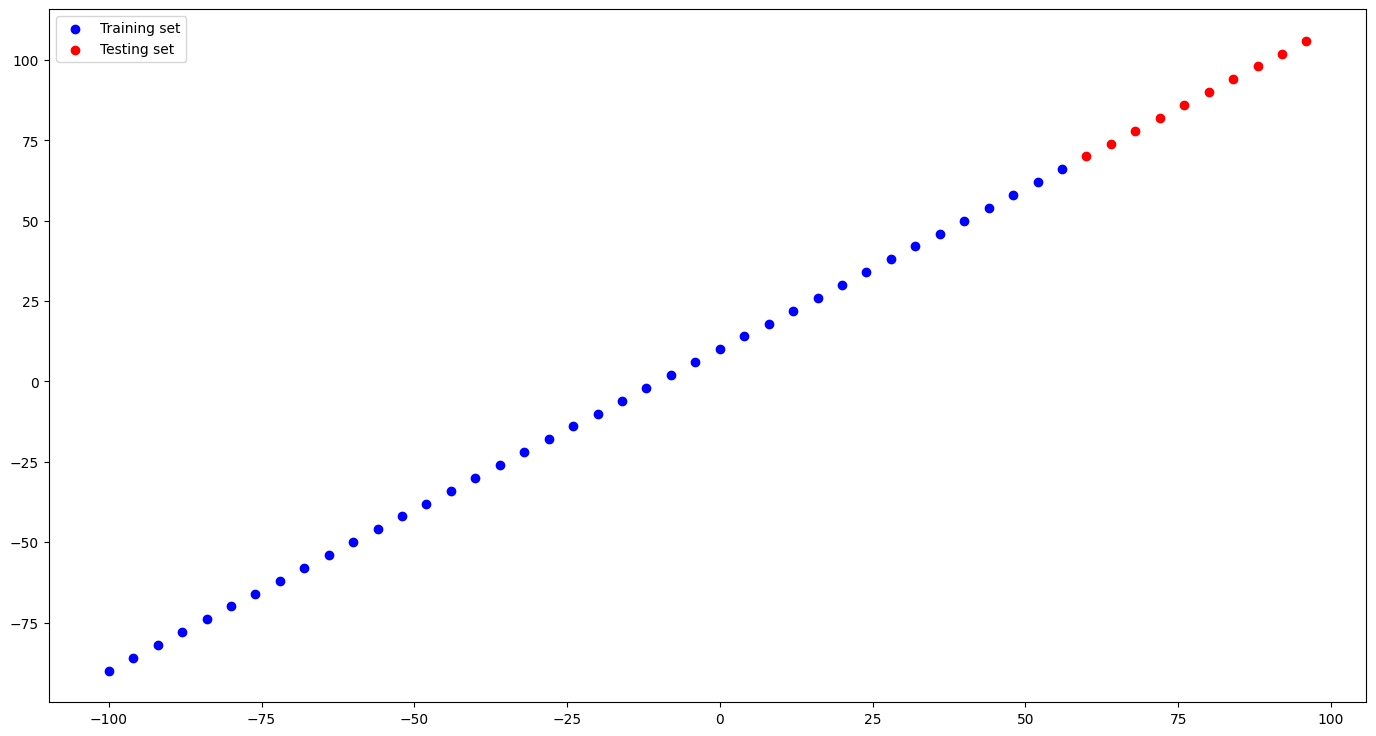

In [62]:
plt.figure(figsize=(17, 9))
plt.scatter(x_train, y_train, c="b", label="Training set")
plt.scatter(x_test, y_test, c="r", label="Testing set")

plt.legend()
plt.show()

# 1. Creating the model


In [63]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(40, activation="relu",name="1"),
    tf.keras.layers.Dense(40, activation="relu",name="2")
])

# 2. Compliling model


In [64]:
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0001),
    metrics=["mae"]
)


# 3. Fitting model


In [65]:
model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=150, verbose=0)

In [66]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1 (Dense)                   (None, 40)                80        
                                                                 
 2 (Dense)                   (None, 40)                1640      
                                                                 
Total params: 1,720
Trainable params: 1,720
Non-trainable params: 0
_________________________________________________________________


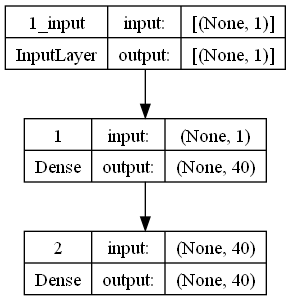

In [67]:
from tensorflow.keras.utils import plot_model
# import g
plot_model(model=model,show_shapes=True)


In [69]:
# import math
print(x_test)
y_pred = model.predict(x_test,verbose=2)
y_pred

tf.Tensor([60 64 68 72 76 80 84 88 92 96], shape=(10,), dtype=int32)
1/1 - 0s - 16ms/epoch - 16ms/step


array([[ 0.       , 12.531273 ,  0.       ,  0.       ,  0.       ,
        10.245649 ,  4.81828  , 15.863802 ,  9.122176 ,  0.       ,
         0.       ,  0.       , 12.229706 , 11.925739 ,  0.       ,
         0.       ,  0.       , 14.035788 , 12.438037 ,  7.711657 ,
         5.8273964, 13.787026 , 19.93751  , 12.163916 ,  4.777001 ,
         0.       , 10.634361 ,  0.       ,  0.       ,  4.228861 ,
        17.150707 ,  0.       ,  4.3305025, 22.0782   ,  0.       ,
         0.       ,  4.164283 , 15.906085 , 13.557744 ,  0.       ],
       [ 0.       , 13.364884 ,  0.       ,  0.       ,  0.       ,
        10.926193 ,  5.1370173, 16.921062 ,  9.727924 ,  0.       ,
         0.       ,  0.       , 13.043448 , 12.718825 ,  0.       ,
         0.       ,  0.       , 14.971213 , 13.264239 ,  8.22523  ,
         6.212688 , 14.705574 , 21.26446  , 12.975315 ,  5.0934763,
         0.       , 11.342902 ,  0.       ,  0.       ,  4.5092654,
        18.292461 ,  0.       ,  4.619711 , 23.